# SC1015 MINI-PROJECT

OBJECTIVE: TO FIND THE BEST METHODOLOGY IN PREDICTING STOCK PRICES

SECTION 1: IMPORTING NECESSARY LIBRARIES

SECTION 2: DATA PREPROCESSING

SECTION 3: RMSE AND MAPE

SECTION 4: DIVIDING TRAIN AND TEST DATA

SECTION 5: #1 NAIVE

SECTION 6: #2 MA-30; MA-50; MA-200

SECTION 7: #3 Exponential Smoothing

SECTION 8: #4 LSTM

SECTION 9: CONCLUSION

# SECTION 1 - IMPORTING NECESSARY LIBRARIES

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#essential for LSTM model
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2023-04-20 20:35:32.186299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# SECTION 2 - DATA PREPROCESSING

In [2]:
stock_cleaned_data=pd.read_csv('../data/stock_cleaned_data.csv', index_col = 0)

In [3]:
stock_cleaned_data.head()

,open,high,low,close,adjclose,volume
date,,,,,,
2023-04-18,415.58,415.72,412.7802,414.21,414.21,63559997
2023-04-17,412.37,413.96,411.0850,413.94,413.94,65496534
2023-04-14,412.81,415.09,410.0600,412.46,412.46,78161500
2023-04-13,409.18,413.84,407.9922,413.47,413.47,85814754
2023-04-12,411.87,412.17,407.4400,408.05,408.05,86420379


In [4]:
stock_cleaned_data.index

Index(['2023-04-18', '2023-04-17', '2023-04-14', '2023-04-13', '2023-04-12',
       '2023-04-11', '2023-04-10', '2023-04-06', '2023-04-05', '2023-04-04',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', name='date', length=5903)

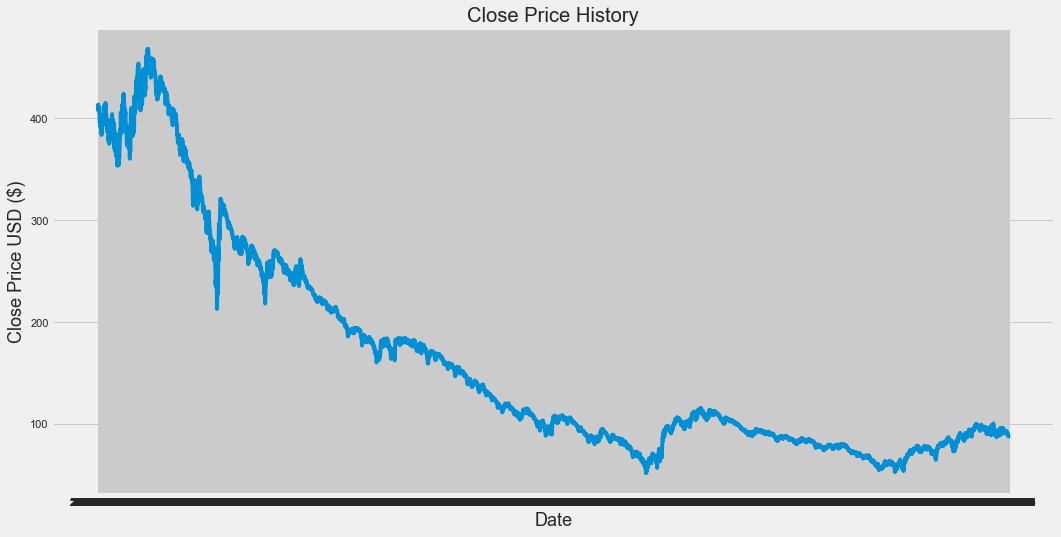

In [5]:
#plot the stock price graph
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(stock_cleaned_data['adjclose'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

# SECTION 3 - RMSE AND MAPE

In [6]:
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))                   
    return rmse

### The effectiveness of prediction method is measured in terms of the Mean Absolute Percentage Error (MAPE) and RMSE
def calculate_mape(y_true, y_pred): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)    
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100    
    return mape

# SECTION 4 - DIVIDING TRAIN AND TEST DATA

In [7]:
data=stock_cleaned_data.filter(['close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

4723

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.8449707 ],
       [0.84431152],
       [0.84069824],
       ...,
       [0.16452637],
       [0.16231373],
       [0.16467895]])

In [9]:
train_data=scaled_data[0:training_data_len, : ]
x_train= []
y_train= []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.8449707 , 0.84431152, 0.84069824, 0.84316406, 0.82993164,
       0.83400879, 0.83374023, 0.83271484, 0.82883301, 0.83144531,
       0.83701172, 0.83320312, 0.81931152, 0.81357422, 0.79953613,
       0.80170898, 0.79990234, 0.79360352, 0.79101562, 0.80761719,
       0.79499512, 0.78583984, 0.80078125, 0.78410644, 0.79008789,
       0.77453613, 0.77587891, 0.78967285, 0.8076416 , 0.80605469,
       0.82119141, 0.82050781, 0.80493164, 0.79743652, 0.80114746,
       0.80473633, 0.80144043, 0.81188965, 0.80671387, 0.80805664,
       0.82800293, 0.83049316, 0.84440918, 0.84113769, 0.84160156,
       0.82990723, 0.82758789, 0.8362793 , 0.84736328, 0.83427734,
       0.84042969, 0.85124512, 0.83664551, 0.82609863, 0.81171875,
       0.82414551, 0.821875  , 0.81113281, 0.8107666 , 0.81181641])]
[0.8002197260747552]



# SECTION 5 - #1 NAIVE

# SECTION 6 - #2 MA-30; MA-50; MA-200

# SECTION 7 - #3 EXPONENTIAL SMOOTHING

# SECTION 8 - #4 LSTM

In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4663, 60, 1)

In [12]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2023-04-20 20:37:00.264276: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

4663/4663 [==============================] - 56s 12ms/step - loss: 7.0513e-04


In [15]:
#Create the testing dataset
test_data=scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
x_test=np.array(x_test)

In [17]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

37/37 [==============================] - 1s 10ms/step


In [19]:
calculate_rmse(y_test,predictions)

3.4273596413899154

In [20]:
calculate_mape(y_test,predictions)

2.4167922721502504

/var/folders/w0/yfs2j9b55v32l02sbhskjx0w0000gn/T/ipykernel_91974/2011643448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


<function matplotlib.pyplot.show(close=None, block=None)>

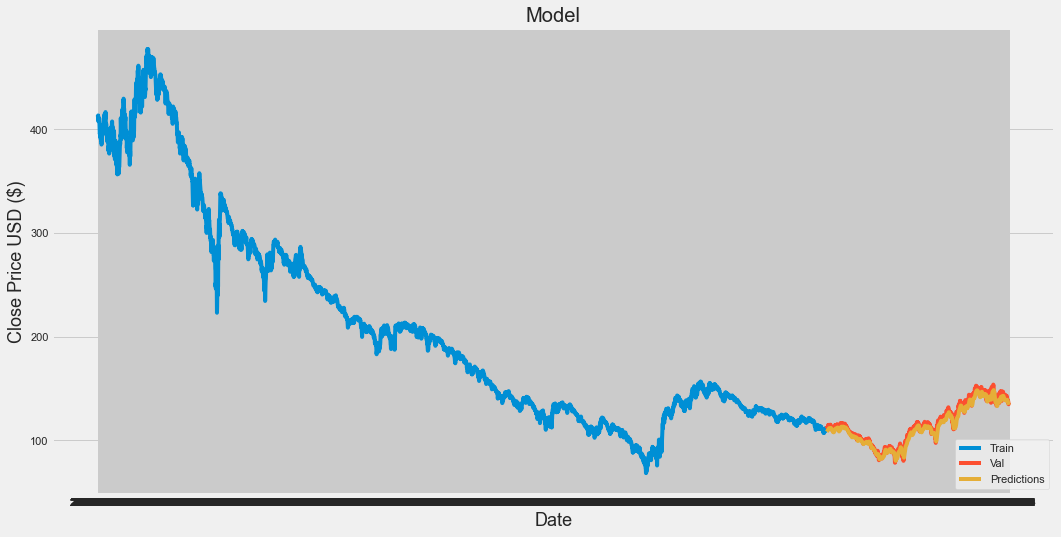

In [21]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show

# SECTION 9 - CONCLUSION